# Report

This report shows the results of a several day web scraping process. The production of renewable energy (solar and wind) along with weather information (global UV radiation and wind speed).

In [22]:
import pandas as pd

filename = 'api_results.h5'
with pd.HDFStore(filename, 'r') as store:
    data_dict = {}
    for key in store.keys():
        data_dict[key] = store[key]

data_dict

{'/day20250304/dwd':                     timestamp  value   unit             variable
 0   2025-03-04 01:20:00+00:00    0.0  J/cm²  Global UV Radiation
 1   2025-03-04 01:30:00+00:00    0.0  J/cm²  Global UV Radiation
 2   2025-03-04 02:40:00+00:00    0.0  J/cm²  Global UV Radiation
 3   2025-03-04 04:10:00+00:00    0.0  J/cm²  Global UV Radiation
 4   2025-03-04 08:20:00+00:00   16.6  J/cm²  Global UV Radiation
 ..                        ...    ...    ...                  ...
 140 2025-03-04 16:10:00+00:00    5.3  J/cm²  Global UV Radiation
 141 2025-03-04 16:20:00+00:00    4.9  J/cm²  Global UV Radiation
 142 2025-03-04 23:50:00+00:00    0.0  J/cm²  Global UV Radiation
 143 2025-03-04 04:40:00+00:00    0.0  J/cm²  Global UV Radiation
 144 2025-03-04 20:00:00+00:00    0.0  J/cm²  Global UV Radiation
 
 [145 rows x 4 columns],
 '/day20250304/entsoe':                     timestamp      variable    value
 0   2025-03-04 01:00:00+01:00         Solar      0.0
 1   2025-03-04 01:15:00+01:00

Concatenate the datasets inside the dictionary to one long format dataset. 

In [24]:
combined_df = pd.concat(data_dict.values(), keys = data_dict.keys())
combined_df.head()

timestamp  value   unit  \
/day20250304/dwd 0  2025-03-04 01:20:00+00:00    0.0  J/cm²   
                 1  2025-03-04 01:30:00+00:00    0.0  J/cm²   
                 2  2025-03-04 02:40:00+00:00    0.0  J/cm²   
                 3  2025-03-04 04:10:00+00:00    0.0  J/cm²   
                 4  2025-03-04 08:20:00+00:00   16.6  J/cm²   

                               variable  
/day20250304/dwd 0  Global UV Radiation  
                 1  Global UV Radiation  
                 2  Global UV Radiation  
                 3  Global UV Radiation  
                 4  Global UV Radiation

Transform the column timestamp to datetime format.  Check if each column contains correct values by using describe(). 

In [27]:
combined_df["timestamp"] = pd.to_datetime(combined_df["timestamp"], utc = True)
combined_df.describe(include = 'all')


,timestamp,value,unit,variable
count,1371,1371.000000,507,1371
unique,NaN,NaN,2,5
top,NaN,NaN,J/cm²,Global UV Radiation
freq,NaN,NaN,435,435
mean,2025-03-03 11:53:41.881838080+00:00,4640.599322,NaN,NaN
min,2025-03-02 00:00:00+00:00,0.000000,NaN,NaN
25%,2025-03-02 18:00:00+00:00,0.000000,NaN,NaN
50%,2025-03-03 12:00:00+00:00,2634.000000,NaN,NaN
75%,2025-03-04 05:55:00+00:00,6179.000000,NaN,NaN
max,2025-03-05 00:00:00+00:00,40221.000000,NaN,NaN


Descriptive statistics for each variable showing count, mean, std, min,	25%, 50%, 75% and max of the column value.

In [9]:
combined_df.groupby("variable")["value"].describe(include = 'all')

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
Global UV Radiation,435.0,5.174943,8.468774,0.000000,0.000000,0.000000,6.950000,36.000000
Solar,288.0,9910.076389,13978.745223,0.000000,0.000000,0.000000,21374.250000,40221.000000
Wind Offshore,288.0,4402.093750,991.513513,2572.000000,3401.000000,4426.000000,5304.250000,6192.000000
Wind Onshore,288.0,7765.093750,1767.370188,4874.000000,6545.750000,7560.500000,8630.250000,13922.000000
Windspeed 10 m,72.0,24.424584,4.614324,14.345898,20.674121,24.707819,28.058624,34.358788


Show the statsitical values using a box-and-whisker plot.

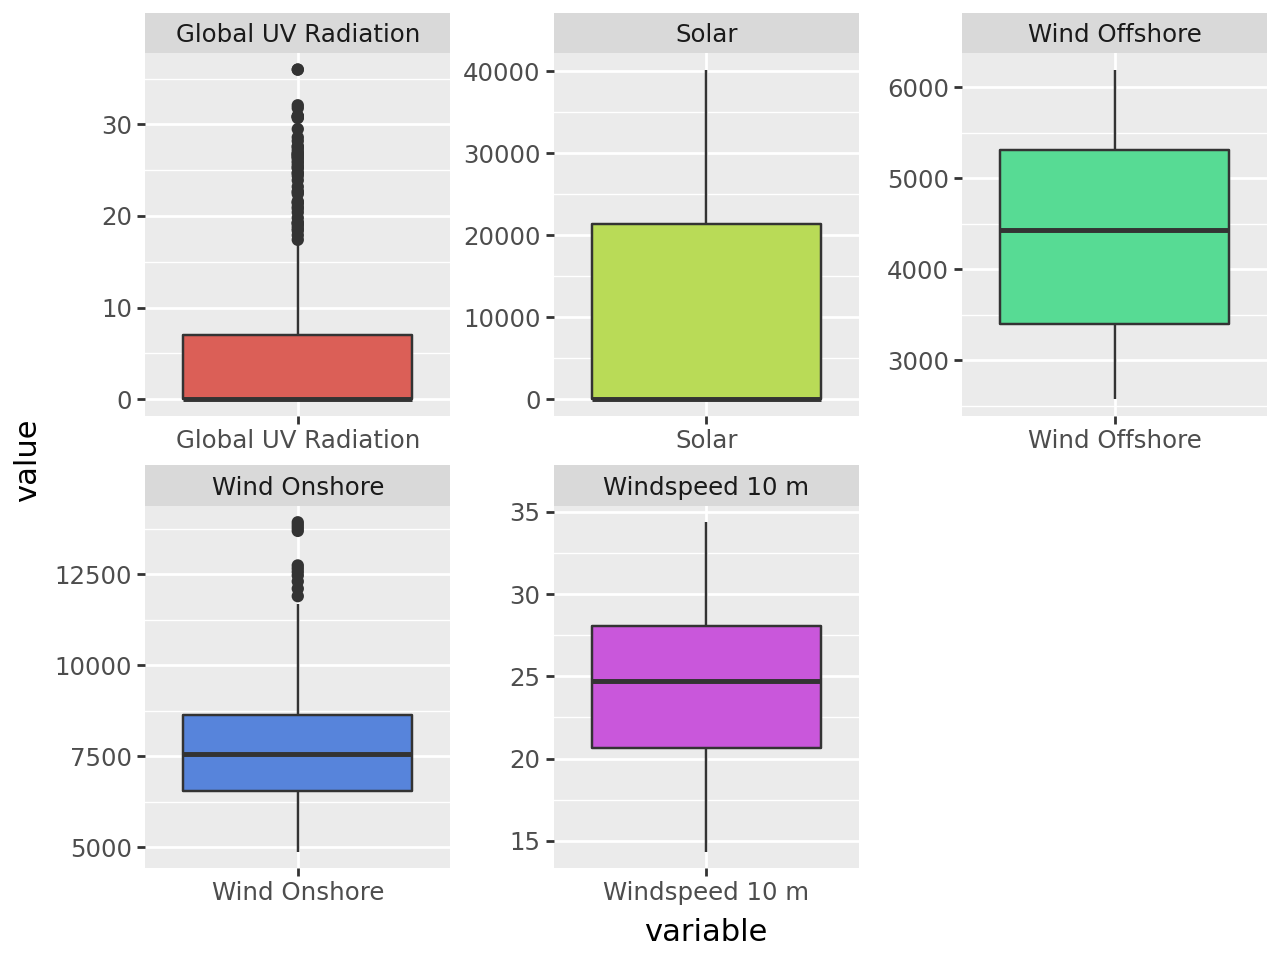

In [29]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    geom_line,
    facet_wrap,
    labs,
    scale_x_datetime,
    element_text,
    theme
)



boxplot = (
    ggplot(combined_df, aes(x='variable', y='value', fill='variable'))
 + geom_boxplot(show_legend=False)
 + facet_wrap("variable", scales="free")
)
boxplot 



Show the timeline of each variable using a line plot.

/home/annaz/anaconda3/lib/python3.12/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


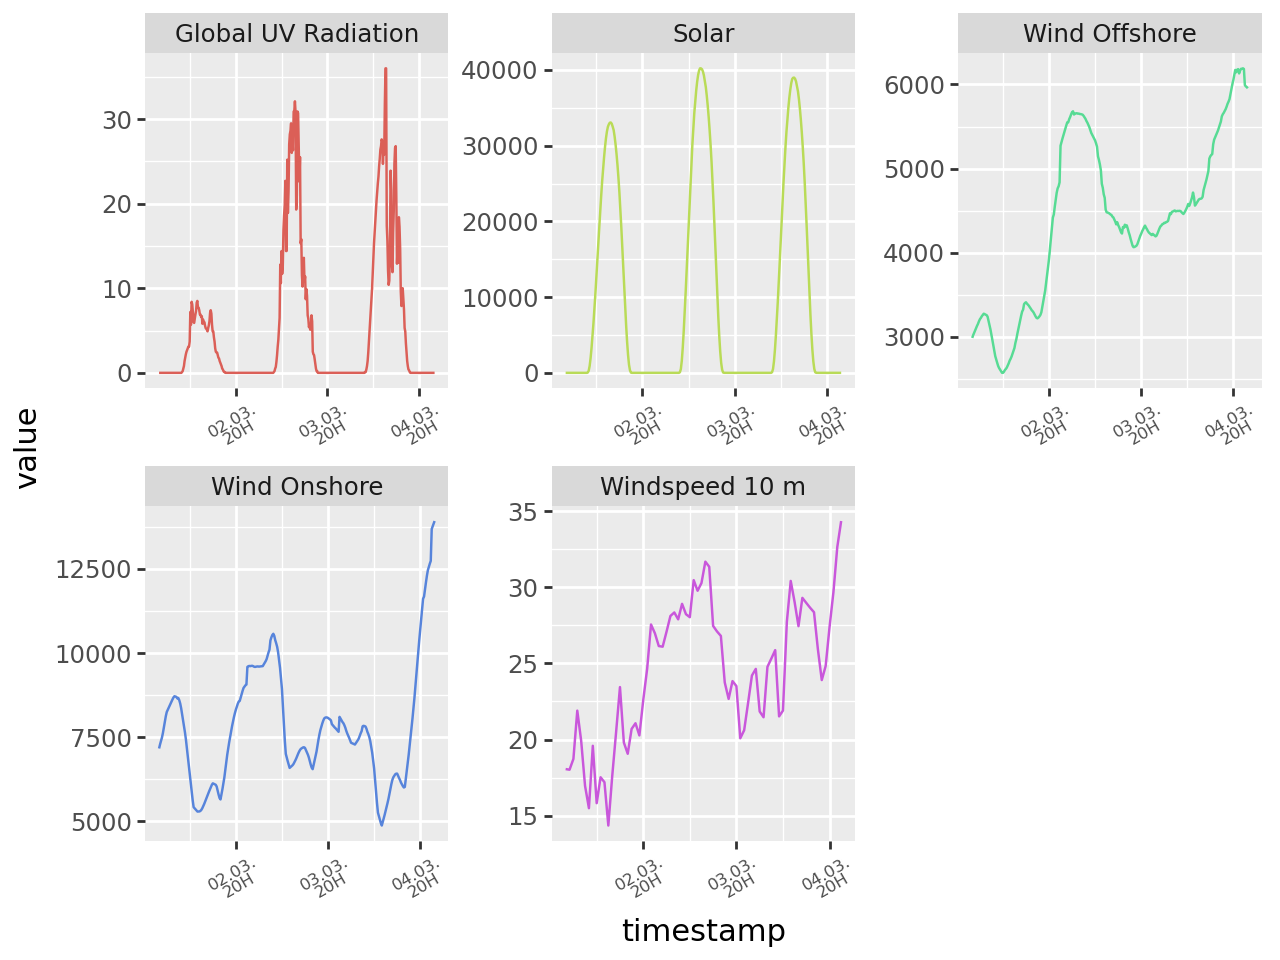

In [17]:

p1 = (
ggplot(combined_df, aes(x="timestamp", y="value", color="variable"))
+ geom_line(show_legend=False)
+ scale_x_datetime(date_breaks="24 hours", date_labels="%d.%m.\n%HH")
+ facet_wrap("variable", scales="free")
)
p1 + theme(axis_text_x=element_text(angle=30, size=6))  
